In [966]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import random
import math






import warnings  
warnings.filterwarnings("ignore") 


In [967]:
df = pd.read_csv('population.csv')
df2 = pd.read_csv('more_than_50k.csv')


In [968]:
df.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94


In [969]:
def removecol(data):


    data = data.drop([ 'AHSCOL' , 'ARACE','AWKSTAT' ,'ACLSWKR' , 'AHGA' ,'AREORGN', 'AUNMEM' , 'AMARITL','ASEX' ,'AMJIND', 'AMJOCC' , 'AUNTYPE' , 'GRINREG' , 'GRINST' ,
     'PEFNTVTY' , 'PEMNTVTY' , 'MIGMTR3' , 'MIGMTR4' , 'MIGSAME','FILESTAT' , 'MIGSUN' , 'PARENT','HHDFMX' , 'HHDREL' , 'MIGMTR1',
          'PENATVTY' , 'PRCITSHP' , 'VETQVA'] , axis = 1 )


    return data

In [970]:
## preprocessing
df= df.replace('[?]', np.nan, regex=True)
df2= df2.replace('[?]', np.nan, regex=True)

limitPer = len(df) * .30
yourdf = df.dropna(thresh=limitPer, axis=1)


(df.fillna(df.mode().iloc[0]))
(df2.fillna(df2.mode().iloc[0]))



,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,57,Self-employed-incorporated,11,2,High school graduate,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
1,44,Private,3,38,High school graduate,0,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,No,1,48,94
2,54,Private,19,26,High school graduate,1550,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
3,25,Private,33,2,9th grade,0,Not in universe,Never married,Retail trade,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,1,Not in universe,2,52,95
4,26,Private,11,5,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,57,Private,14,37,High school graduate,0,Not in universe,Divorced,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
3576,63,Self-employed-not incorporated,37,12,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Separated,Business and repair services,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,49,94
3577,39,Private,41,6,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Married-civilian spouse present,Hospital services,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
3578,53,Self-employed-incorporated,35,2,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94


In [971]:
def binning(data):
    for col in data:
        new_col = 'Binned_'+col
        if(type(data[col][0])!=type('col')):
            boxes=[]

            ## Dividing the data into 6 equal parts using percentile
            boxes.append(data[col].quantile(0.2*1)) 
            boxes.append(data[col].quantile(0.2*2)) 
            boxes.append(data[col].quantile(0.2*3)) 
            boxes.append(data[col].quantile(0.2*4)) 
            boxes.append(data[col].quantile(0.2*5)) 
                
            data[new_col]=data[col]   ## creating a new column
            var_dataset=data[new_col]
            
            names=['MINIMAL','LESS','MEDIUM','HIGH','VERY HIGH' ]
            for j in range(len(boxes)):
                if(j!=0):
                    var_dataset[(data[col]>boxes[j-1]) & (data[col]<=boxes[j])]=names[j]
                else:
                    var_dataset[data[col]<=boxes[0]]=names[j]
                    
            
            data=data.drop(col,axis=1)


    return data



In [972]:
def hotEncoder(data):
    final_df=[[]]
    columns=[]
    for i in data:
        columns.append(i)

    for i in data:
        temp_df=pd.get_dummies(data[i]) ## HotEncoding 
        
        for k in temp_df:
            temp_df.rename(columns = {k:i+"_"+k}, inplace = True)  ## Renaming the columns
                
        final_df[0].append(temp_df) ## Adding the temporary dataset with new columns togeths

    encoded_df = pd.concat(final_df[0],axis = 1)    ## Compiling the entire dataset to return

    return encoded_df
 

In [973]:

def fit(data , num_clusters, dim , epochs):
    randoms=random.sample(range(len(data)),num_clusters)
    centers=np.zeros((num_clusters,dim))

    for i in range(len(randoms)):
        centers[i]=data[randoms[i]] ## randomly alloting the centers
        
    distance_store=[]
    
    for i in range(epochs): ## Running the code for number of iterations
        distance={} ## Storing the distance in dictionary
        for k in range(num_clusters):
            distance[k]=np.sum(np.absolute(data - centers[k] ),axis=1)
            
        min_distance= 10000

        for k in range(num_clusters):
            min_distance=np.minimum(min_distance,distance[k])   ## Calculating the minimum distance for clustering
        
        clusters={}  ## saving the number of cluster 
        
        for k in range(num_clusters):
            clusters[k]=(distance[k]==min_distance)  ## Saving all the points in a given cluster 
            clusters[k]=data[clusters[k]]

        for k in range(num_clusters):
            centers[k]=np.median(clusters[k],axis=0)  ## Taking the medians of points in the cluster

        distance_store.append(np.sum(min_distance)) ## Saving the minimum distance 

    
    distance=distance_store[-1] ## Returning the distance after the final epoch
    return distance,clusters

In [974]:
df = removecol(df)
df2 = removecol(df2)
df


,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,VETYN,WKSWORK,YEAR
0,73,0,0,0,0,0,0,0,0,2,0,95
1,58,4,34,0,0,0,0,1,0,2,52,94
2,18,0,0,0,0,0,0,0,0,2,0,95
3,9,0,0,0,0,0,0,0,0,0,0,94
4,10,0,0,0,0,0,0,0,0,0,0,94
...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,0,0,0,0,0,0,0,0,2,0,95
199519,65,37,2,0,6418,0,9,1,0,2,52,94
199520,47,0,0,0,0,0,157,6,0,2,52,95
199521,16,0,0,0,0,0,0,0,0,2,0,95


In [975]:
df = pd.get_dummies(df)
df2 = pd.get_dummies(df2)
df.head()



,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,VETYN,WKSWORK,YEAR
0,73,0,0,0,0,0,0,0,0,2,0,95
1,58,4,34,0,0,0,0,1,0,2,52,94
2,18,0,0,0,0,0,0,0,0,2,0,95
3,9,0,0,0,0,0,0,0,0,0,0,94
4,10,0,0,0,0,0,0,0,0,0,0,94


In [976]:
df = binning(df)
df2 = binning(df2)
df

,Binned_AAGE,Binned_ADTIND,Binned_ADTOCC,Binned_AHRSPAY,Binned_CAPGAIN,Binned_CAPLOSS,Binned_DIVVAL,Binned_NOEMP,Binned_SEOTR,Binned_VETYN,Binned_WKSWORK,Binned_YEAR
0,VERY HIGH,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,LESS,MINIMAL,MEDIUM
1,VERY HIGH,MEDIUM,VERY HIGH,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MEDIUM,MINIMAL,LESS,HIGH,MINIMAL
2,LESS,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,LESS,MINIMAL,MEDIUM
3,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL
4,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL
...,...,...,...,...,...,...,...,...,...,...,...,...
199518,VERY HIGH,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,LESS,MINIMAL,MEDIUM
199519,VERY HIGH,VERY HIGH,MEDIUM,MINIMAL,VERY HIGH,MINIMAL,VERY HIGH,MEDIUM,MINIMAL,LESS,HIGH,MINIMAL
199520,HIGH,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,VERY HIGH,VERY HIGH,MINIMAL,LESS,HIGH,MEDIUM
199521,LESS,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,MINIMAL,LESS,MINIMAL,MEDIUM


In [977]:
df = hotEncoder(df)
df2 = hotEncoder(df2)

df.head()

,Binned_AAGE_HIGH,Binned_AAGE_LESS,Binned_AAGE_MEDIUM,Binned_AAGE_MINIMAL,Binned_AAGE_VERY HIGH,Binned_ADTIND_HIGH,Binned_ADTIND_MEDIUM,Binned_ADTIND_MINIMAL,Binned_ADTIND_VERY HIGH,Binned_ADTOCC_HIGH,...,Binned_NOEMP_VERY HIGH,Binned_SEOTR_MINIMAL,Binned_SEOTR_VERY HIGH,Binned_VETYN_LESS,Binned_VETYN_MINIMAL,Binned_WKSWORK_HIGH,Binned_WKSWORK_MEDIUM,Binned_WKSWORK_MINIMAL,Binned_YEAR_MEDIUM,Binned_YEAR_MINIMAL
0,0,0,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
1,0,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
2,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
3,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
4,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1


In [978]:

pca_pop = PCA(n_components=20)
population_transformed=pca_pop.fit_transform(df)

df = population_transformed

In [979]:
k_values=[]
distance_values=[]
i=10
while i in range(10,25):
    k_values.append(i)
    distance,clus=fit ( df , i , 20 , 10  )
    distance_values.append(distance/i)
    i = i+1


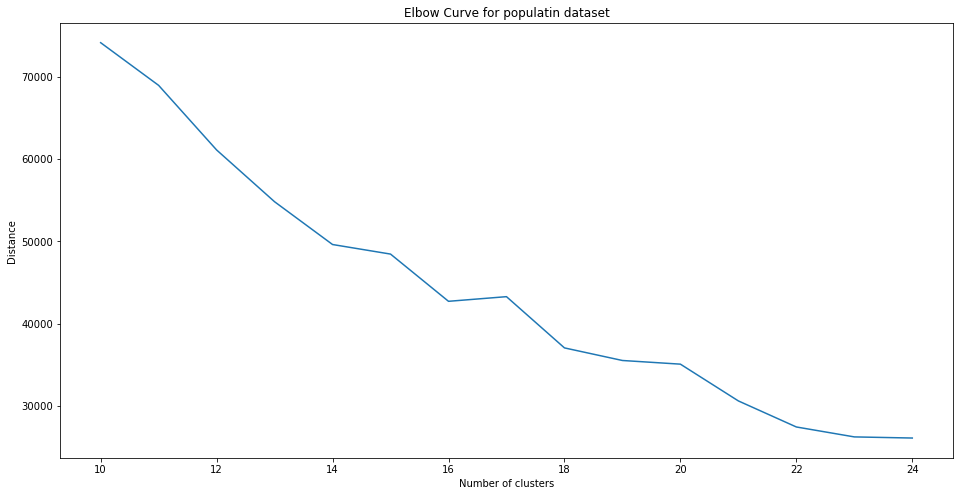

In [980]:
plt.figure(figsize=(16,8))
plt.xlabel("Number of clusters")
plt.ylabel("Distance")
plt.title("Elbow Curve for populatin dataset")
plt.plot(k_values,distance_values)

In [981]:
newdata = PCA(n_components=2).fit_transform(df)
newdata
X = newdata[: , 0]
y = newdata[: , 1]


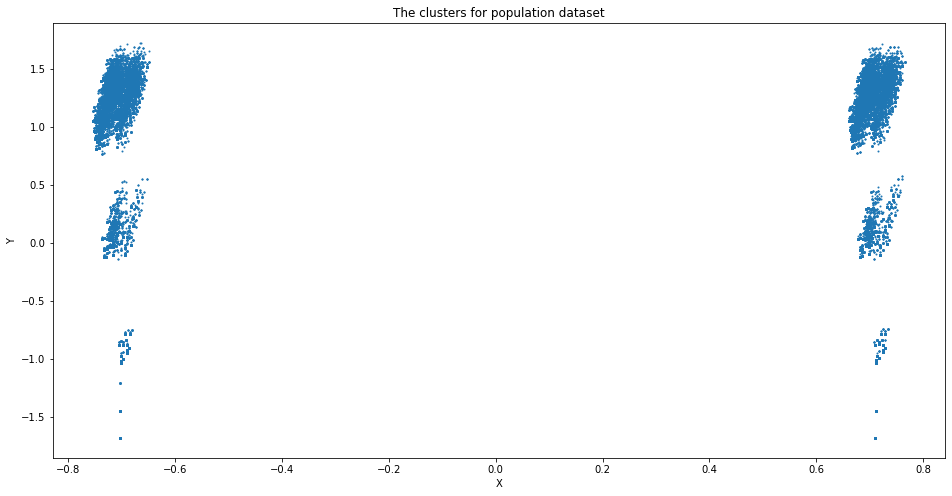

In [982]:
plt.figure(figsize=(16,8))
plt.scatter(y, X , s=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('The clusters for population dataset')
plt.show()

In [990]:

pca_pop = PCA(n_components=20)
population_transformed=pca_pop.fit_transform(df2)

df2 = population_transformed


In [993]:
k_values=[]
distance_values=[]
for i in range(10,25):
    k_values.append(i)
    # kmed=KMedians(n_clusters=i,n_iters=10)
    # kmed = fit ( df , i , 20 , 10  )
    distance,_=fit ( df2 , i , 20 , 10  )
    distance_values.append(distance/i)


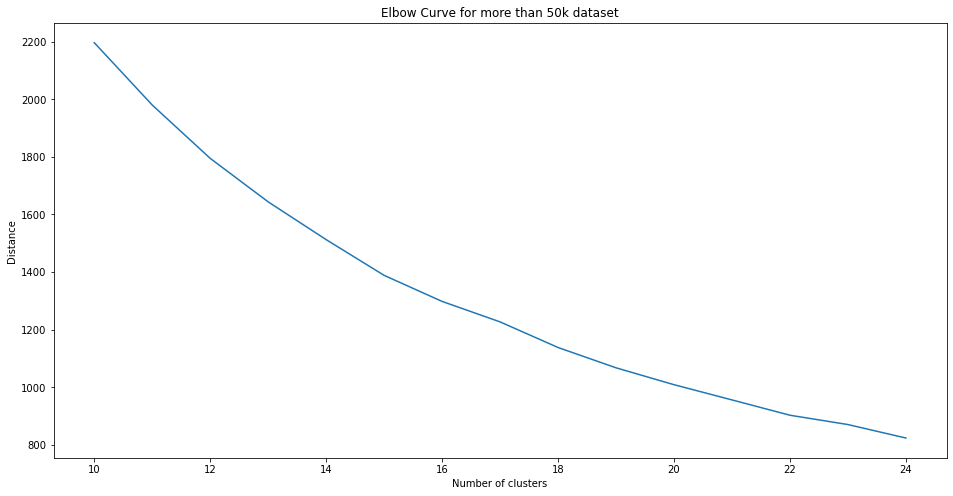

In [994]:
plt.figure(figsize=(16,8))
plt.xlabel("Number of clusters")
plt.ylabel("Distance")
plt.title("Elbow Curve for more than 50k dataset")
plt.plot(k_values,distance_values)

In [986]:
newdata = PCA(n_components=2).fit_transform(df2)
newdata
X = newdata[: , 0]
y = newdata[: , 1]


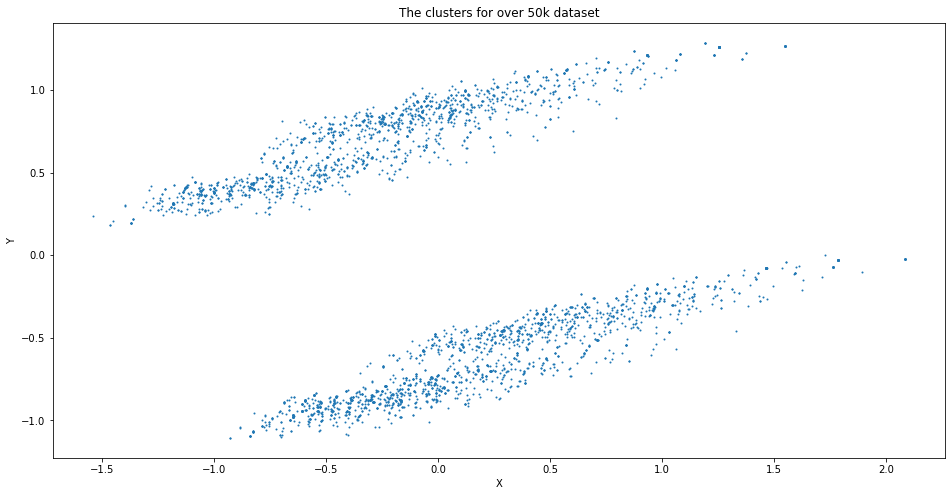

In [987]:
plt.figure(figsize=(16,8))
plt.scatter(y, X , s=1 )
plt.xlabel('X')
plt.ylabel('Y')
plt.title('The clusters for over 50k dataset')
plt.show()